Dataset Shape: (178, 14)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None

Statistical Summary:
             Type     Alcohol       Mali

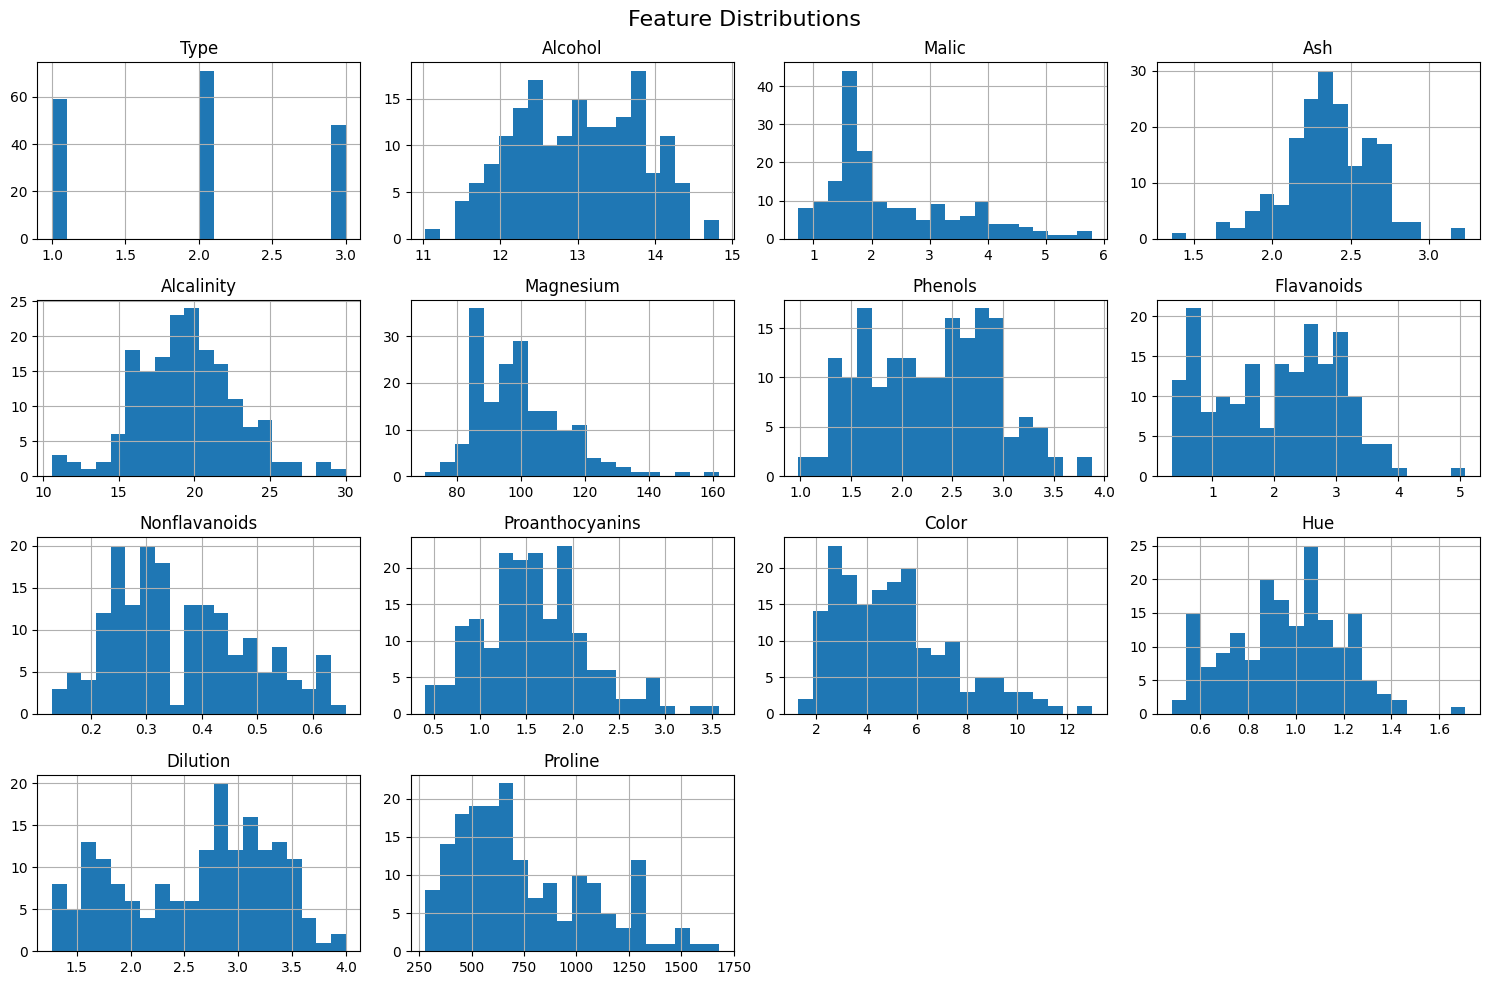

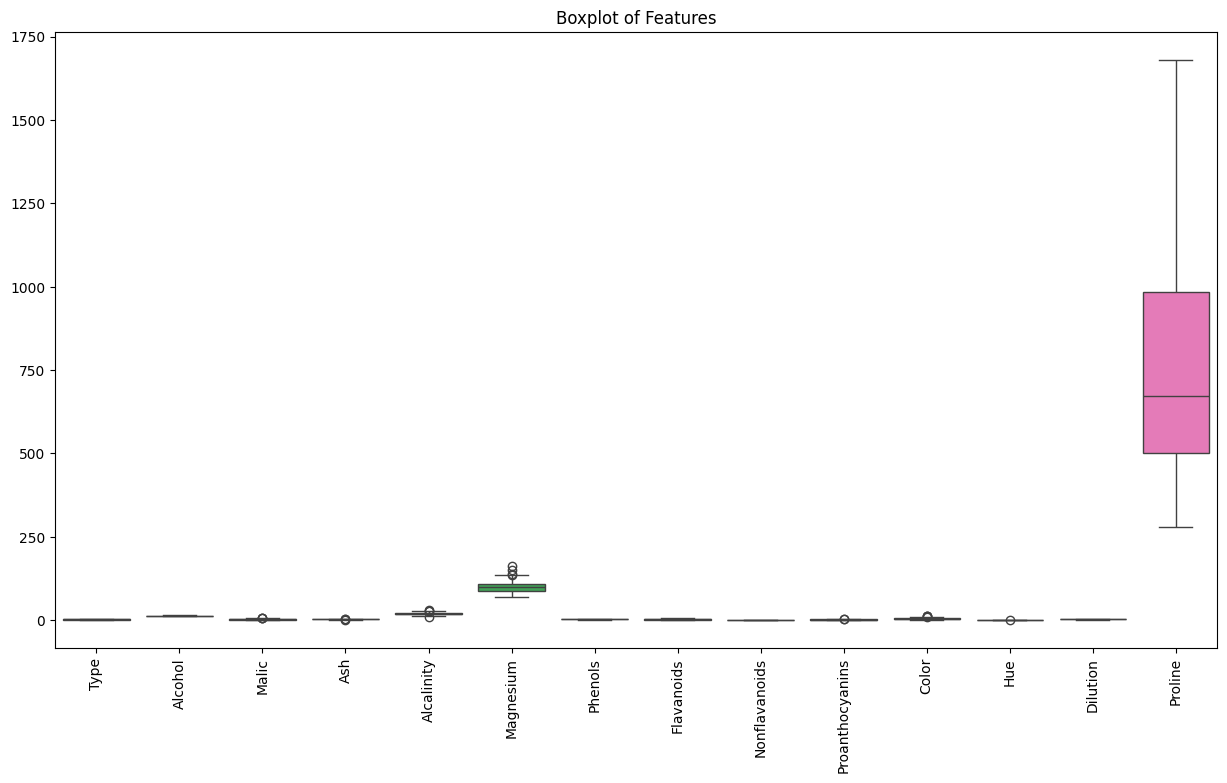

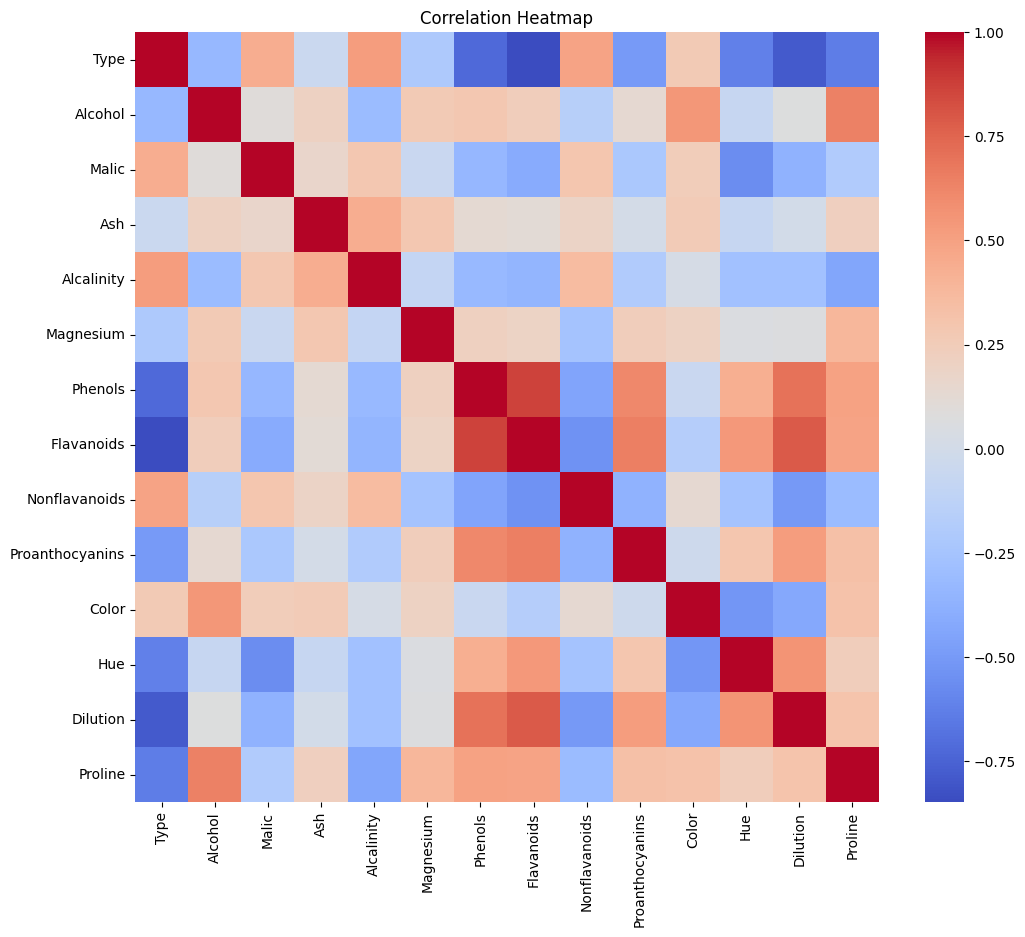

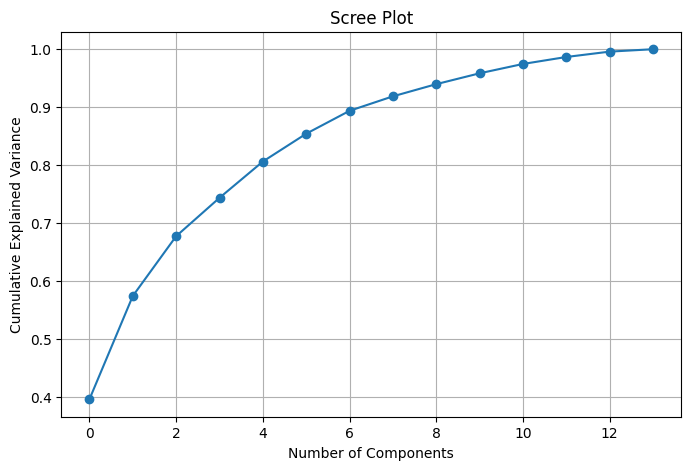


Clustering Metrics (Original Data)
Silhouette Score: 0.30648398324833453
Davies-Bouldin Index: 1.315707552261773


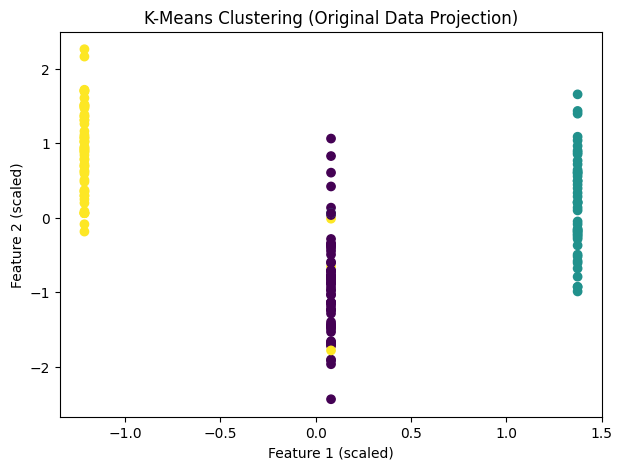


Clustering Metrics (PCA Data)
Silhouette Score: 0.6024415520362845
Davies-Bouldin Index: 0.5397078562575711


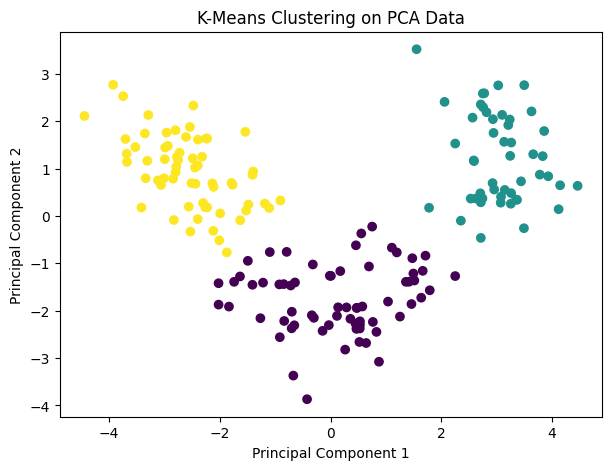


=== COMPARISON SUMMARY ===
Silhouette Score - Original Data: 0.306
Silhouette Score - PCA Data: 0.602
Davies-Bouldin Index - Original Data: 1.316
Davies-Bouldin Index - PCA Data: 0.540

Conclusion:
- PCA improves clustering performance and visualization.
- PCA reduces noise and redundancy.
- Clustering on PCA-transformed data is recommended for high-dimensional datasets.


In [2]:
# =========================
# PCA + CLUSTERING (FULL PIPELINE IN ONE CELL)
# =========================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# -------------------------
# Task 1: Load Dataset & EDA
# -------------------------
df = pd.read_csv("C:\\Users\\Shreyas Mahale\\Downloads\\PCA\\PCA\\wine.csv")

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())

# Histograms
df.hist(figsize=(15, 10), bins=20)
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# Boxplots
plt.figure(figsize=(15, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
plt.show()

# Correlation Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap")
plt.show()

# -------------------------
# Task 2: PCA
# -------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

pca_full = PCA()
X_pca_full = pca_full.fit_transform(X_scaled)

# Scree Plot
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Scree Plot")
plt.grid()
plt.show()

# PCA with 2 Components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# -------------------------
# Task 3: Clustering on Original Data
# -------------------------
kmeans_original = KMeans(n_clusters=3, random_state=42)
labels_original = kmeans_original.fit_predict(X_scaled)

sil_orig = silhouette_score(X_scaled, labels_original)
db_orig = davies_bouldin_score(X_scaled, labels_original)

print("\nClustering Metrics (Original Data)")
print("Silhouette Score:", sil_orig)
print("Davies-Bouldin Index:", db_orig)

# Visualization (Projection)
plt.figure(figsize=(7, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=labels_original, cmap='viridis')
plt.title("K-Means Clustering (Original Data Projection)")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

# -------------------------
# Task 4: Clustering on PCA Data
# -------------------------
kmeans_pca = KMeans(n_clusters=3, random_state=42)
labels_pca = kmeans_pca.fit_predict(X_pca)

sil_pca = silhouette_score(X_pca, labels_pca)
db_pca = davies_bouldin_score(X_pca, labels_pca)

print("\nClustering Metrics (PCA Data)")
print("Silhouette Score:", sil_pca)
print("Davies-Bouldin Index:", db_pca)

# Visualization
plt.figure(figsize=(7, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_pca, cmap='viridis')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("K-Means Clustering on PCA Data")
plt.show()

# -------------------------
# Task 5 & 6: Comparison Summary
# -------------------------
print("\n=== COMPARISON SUMMARY ===")
print(f"Silhouette Score - Original Data: {sil_orig:.3f}")
print(f"Silhouette Score - PCA Data: {sil_pca:.3f}")
print(f"Davies-Bouldin Index - Original Data: {db_orig:.3f}")
print(f"Davies-Bouldin Index - PCA Data: {db_pca:.3f}")

print("\nConclusion:")
print("- PCA improves clustering performance and visualization.")
print("- PCA reduces noise and redundancy.")
print("- Clustering on PCA-transformed data is recommended for high-dimensional datasets.")
